<a href="https://colab.research.google.com/github/brahma2024/Deep-Implicit-Layers/blob/main/Ch2_2_ImplicitFunc%2BAutoDiff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Differentiation of functions defined by Ordinary Differential Equations (ODEs)

**Agenda**
1. Calculate and plot the solution of an ODE y_T
2. Differentiate through an ODE solver (ODEINT)

In [75]:
!pip install torchdiffeq
import torch
from torchdiffeq import odeint

In [76]:
from functools import partial
import matplotlib.pyplot as plt
from torch.autograd import grad
import numpy as np

%matplotlib inline

# 1. Define a simple ODE system

In [10]:
# Define the ODE system
# Consider a simple ODE dy/dt = f(t, y, k) = -k * y
def f(t, y, params):
  k = params
  return - k * y

# Initial value for a 2D system
y0 = torch.tensor([1.0, 2.0], requires_grad=True) # Make sure y0 requires gradients

# Define system parameters
# Parameter k
k = torch.tensor([0.5], requires_grad=True)  # Make sure k requires gradients

# Time points
t = torch.linspace(0., 5., 200)

# Use functools.partial to fix the params argument
f_partial = partial(f, params=k)

# Solve the ODE using a library (e.g. ODEINT)
# y_T = odeint(lambda t, y: f(t, y, k), y0, t)
y_T = odeint(f_partial, y0, t)

print(k.item(),k.shape)
print(y_T.shape)
print(y_T) # solution of the ODE at each of the 200 timestep

0.5 torch.Size([1])
torch.Size([200, 2])
tensor([[1.0000, 2.0000],
        [0.9875, 1.9750],
        [0.9752, 1.9504],
        [0.9630, 1.9260],
        [0.9510, 1.9020],
        [0.9391, 1.8782],
        [0.9274, 1.8548],
        [0.9158, 1.8316],
        [0.9044, 1.8088],
        [0.8931, 1.7862],
        [0.8819, 1.7639],
        [0.8709, 1.7419],
        [0.8601, 1.7201],
        [0.8493, 1.6986],
        [0.8387, 1.6774],
        [0.8282, 1.6565],
        [0.8179, 1.6358],
        [0.8077, 1.6154],
        [0.7976, 1.5952],
        [0.7877, 1.5753],
        [0.7778, 1.5556],
        [0.7681, 1.5362],
        [0.7585, 1.5170],
        [0.7491, 1.4981],
        [0.7397, 1.4794],
        [0.7305, 1.4609],
        [0.7213, 1.4427],
        [0.7123, 1.4247],
        [0.7034, 1.4069],
        [0.6947, 1.3893],
        [0.6860, 1.3720],
        [0.6774, 1.3549],
        [0.6690, 1.3379],
        [0.6606, 1.3212],
        [0.6524, 1.3048],
        [0.6442, 1.2885],
        [0.6362, 1.2724

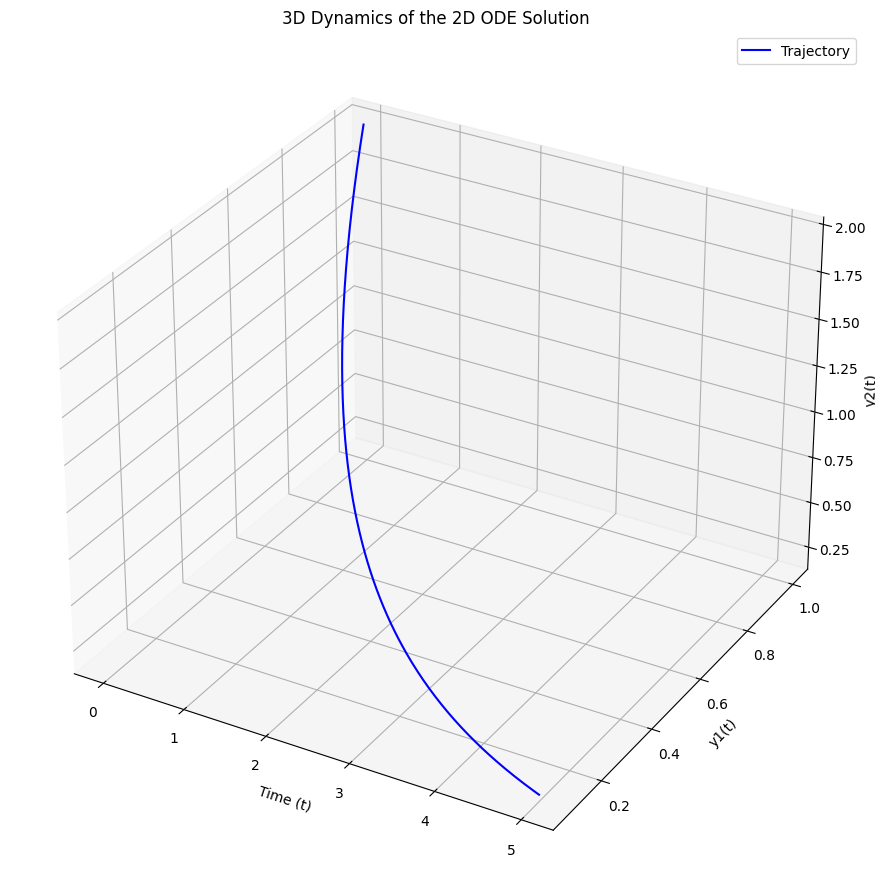

In [11]:
# Plotting the ODE solution in 3D
fig = plt.figure(figsize=(11, 14))
ax = fig.add_subplot(111, projection='3d')

# Convert the tensor to numpy for plotting
y_np = y_T.detach().numpy()
t_np = t.numpy()

# Plot the dynamics of y_T in 3D
ax.plot(t_np, y_np[:, 0], y_np[:, 1], label='Trajectory', color='b')

# Set labels
ax.set_xlabel('Time (t)')
ax.set_ylabel('y1(t)')
ax.set_zlabel('y2(t)')
ax.set_title('3D Dynamics of the 2D ODE Solution')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [12]:
print(y_T[-1]) # this is final value of y_T at t = T

# Define system parameters
# Parameter k
k = torch.tensor([0.5], requires_grad=True)  # Make sure k requires gradients

lr = 1e-2

iters = 0
lossi = []

loss = torch.tensor(float('inf'))  # Initialize loss to a large value
while iters < 200:
  # Use functools.partial to fix the params argument
  f_partial = partial(f, params=k)

  # Solve the ODE using a library (e.g. ODEINT)
  # y_T = odeint(lambda t, y: f(t, y, k), y0, t)
  y_T = odeint(f_partial, y0, t)

  # Define a loss function (e.g., the sum of squared errors at the final time point)
  loss = torch.sum((y_T[-1] - torch.tensor([0.5, 0.8]))**2)  # Example target: [0.0, 0.0]
  print(f'{loss=}')
  lossi.append(loss)

  # setting k.grad and y0.grad to non
  # If loss.backward() is called multiple times,
  # k.grad will accumulate gradients unless you explicitly zero it out before each backward pass (e.g., k.grad.zero_())
  # Zero out gradients
  # if k.grad is not None:
  #    k.grad.zero_()
  #if y0.grad is not None:
  #    y0.grad.zero_()

  # Perform backpropagation to compute the gradients
  loss.backward()

  # Differentiate loss w.r.t. k or y0 using automatic differentiation
  # Compared to loss.backward(), grad(loss, k) does not accumulate; it computes the gradient directly and returns it
  # dy_dk = grad(loss, k, retain_graph=True)
  # print(f'{dy_dk=}')

  # Access the gradients
  print(f'Gradient of the loss w.r.t. k: {k.grad}')
  # print(f'Gradient of the loss w.r.t. y0: {y0.grad}')

  with torch.no_grad(): # Prevent this operation from being recorded in the computation graph
    if k.grad is not None:
      k -= lr * k.grad
  print(f'{k=}')

  if loss < 1e-2:
    break

  iters += 1

print(f'{lossi=}')

tensor([0.0821, 0.1642], grad_fn=<SelectBackward0>)
loss=tensor(0.5789, grad_fn=<SumBackward0>)
Gradient of the loss w.r.t. k: tensor([1.3869])
k=tensor([0.4861], requires_grad=True)
loss=tensor(0.5592, grad_fn=<SumBackward0>)
Gradient of the loss w.r.t. k: tensor([2.8474])
k=tensor([0.4577], requires_grad=True)
loss=tensor(0.5154, grad_fn=<SumBackward0>)
Gradient of the loss w.r.t. k: tensor([4.4632])
k=tensor([0.4130], requires_grad=True)
loss=tensor(0.4378, grad_fn=<SumBackward0>)
Gradient of the loss w.r.t. k: tensor([6.3221])
k=tensor([0.3498], requires_grad=True)
loss=tensor(0.3107, grad_fn=<SumBackward0>)
Gradient of the loss w.r.t. k: tensor([8.4621])
k=tensor([0.2652], requires_grad=True)
loss=tensor(0.1273, grad_fn=<SumBackward0>)
Gradient of the loss w.r.t. k: tensor([10.5127])
k=tensor([0.1601], requires_grad=True)
loss=tensor(0.0123, grad_fn=<SumBackward0>)
Gradient of the loss w.r.t. k: tensor([9.8568])
k=tensor([0.0615], requires_grad=True)
loss=tensor(0.5052, grad_fn=<S

[0.5789328217506409, 0.5591892600059509, 0.5154012441635132, 0.4378243088722229, 0.3107174336910248, 0.12725958228111267, 0.012264043092727661, 0.505157470703125, 0.3310159146785736, 0.009491358883678913]


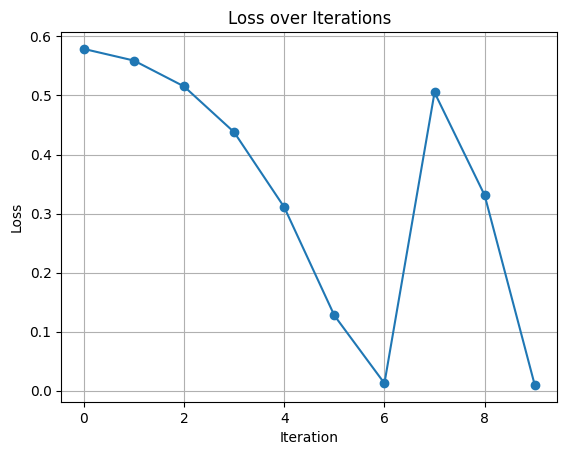

In [13]:
# Plot the loss over iterations
loss_list = [lossx.item() for lossx in lossi]
print(loss_list)
plt.plot(loss_list, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.grid(True)
plt.show()

# 2. Implementation of Lorenz System
- The Lorenz system is a system of ordinary differential equations first studied by mathematician and meteorologist Edward Lorenz. It is notable for having chaotic solutions for certain parameter values and initial conditions. In particular, the Lorenz attractor is a set of chaotic solutions of the Lorenz system.

In [77]:
def f(t, state, rho, sigma, beta):
  x, y, z = state
  return torch.tensor([sigma * (y-x), x * (rho - z) - y, x * y - beta * z])

f_partial = partial(f, rho=28., sigma=10., beta=8./3)
ys = odeint(f_partial,
            y0=torch.tensor([1., 1., 1.], dtype=torch.float32),
            t=torch.tensor(np.linspace(0, 10., 10000), dtype=torch.float32))

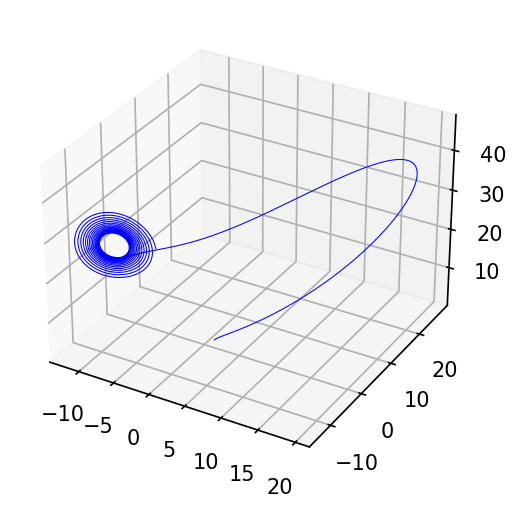

In [78]:
# Plot ys
def plot_3d_path(ax, ys, color):
  x0, x1, x2 = ys.T
  ax.plot(x0, x1, x2, lw=0.5, color=color)

fig = plt.figure(figsize=(6, 4), dpi=150)
ax = fig.add_subplot(projection='3d')
plot_3d_path(ax, ys, 'b');